## Complete Kmean Clustering with Ultrasonic Data

Importing all the libraries required

In [1]:
import numpy as np
import random
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der,fmin_cg
import sys
from sklearn import svm, cluster, mixture

In [2]:
## Function to normalize and create windowed data needed for training/validation/testing
# Depending on the Window size the data is extracted and each window is assigned with respective output
def data_creation(dwt_in,prediction,window_size=20):
    feature_len=np.size(dwt_in)
    dwt_in=np.array(dwt_in)
    prediction=np.array(prediction)
    mu=np.mean(dwt_in)
    st_d=np.std(dwt_in)
    dwt_in=dwt_in-mu
    if st_d >0.01e-12:
        dwt_in=dwt_in/st_d

    new_mu=np.mean(dwt_in)
    dwt_in=np.append(new_mu*np.ones(window_size-1),dwt_in)    
    stack_prediction=np.array(np.matrix(prediction).T)
    stack_dwt=[]
    for i in range(feature_len):
        temp=dwt_in[i:i+window_size]
        temp=np.squeeze(np.asarray(np.fliplr(np.matrix(temp))))
        temp=np.power(temp,2)
        stack_dwt.append(temp)
            
    stack_dwt=np.array(stack_dwt)
    return[stack_dwt,stack_prediction]

In [3]:
file_path="/home/kushal/Desktop/Simulation/POC/Ultrasonic_dataset_14/generated_data/mar_22_rotate/DWT_Lev2/"
dwt_list=[]
annotation_list=[]
file_indices=[15,16,20,21,22,28,30,31,34,41,42,43,44,45,47,48,50,51,52,53,54,55,61,62,63,64,65,66,71,72,73,74,
                  75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95,96,97,98,99,100,103,104,105,106,107,108,
                  109,110,111,112,113,114,115,116,117,118,119,124,125,126,127,128,129,130,136,137,138,139,
                  140,141,142,145,146,147,148,149,150,162,170,171,172,175,176,207,239,240]
rotate_by=[0,600,1000,1400,1700]



for file_index in file_indices:
    for rotate in rotate_by:
        dwt_file_name="selected_mar22_dwt_l2_index_"+str(file_index)+"_rotate_"+str(rotate)+".dat"
        ann_file_name="annotation_dwt_l2_index_"+str(file_index)+"_rotate_"+str(rotate)+".dat"
        dwt_list.append(dwt_file_name)
        annotation_list.append(ann_file_name)

In [4]:
for i in range(50):
    dwt_file=dwt_list[i]
    ann_file=annotation_list[i]
    dwt_in=np.loadtxt(file_path+dwt_file)
    ann_in=np.loadtxt(file_path+ann_file)
    [temp_in,temp_out]=data_creation(dwt_in[0],ann_in,window_size=40)
    if i==0:
       data_in=temp_in
       data_out1=temp_out
    else:    
       data_in=np.vstack((data_in,temp_in))
       data_out1=np.vstack((data_out1,temp_out))
    #print(temp_in)
   
x=np.asarray(data_in)
y=np.squeeze(np.asarray(data_out1))
#print(x)

In [5]:
km=cluster.KMeans(n_clusters=2,random_state=0).fit(x)
gmm=mixture.GaussianMixture(n_components=2,covariance_type='tied').fit(x)

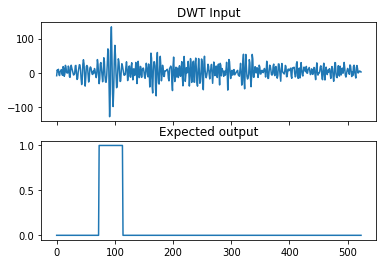

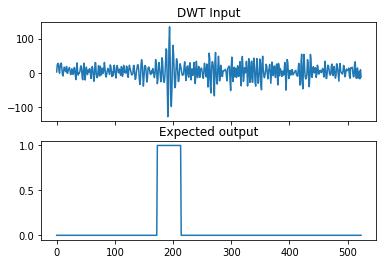

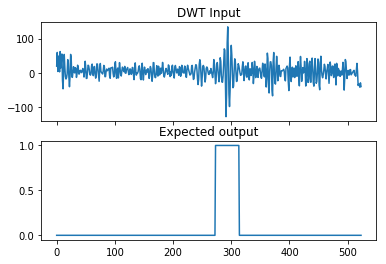

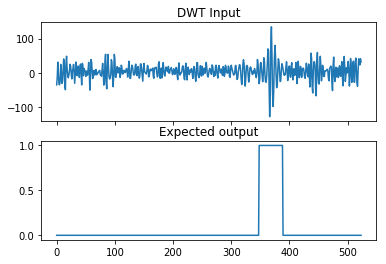

In [8]:
for i in range(101,105):
    test_inf=dwt_list[i]
    test_outf=annotation_list[i]
    test_in=np.loadtxt(file_path+test_inf)
    test_out=np.loadtxt(file_path+test_outf)
    [stest_in,stest_out]=data_creation(test_in[0],test_out,window_size=40)
    stest_in=stest_in.tolist()
    stest_out=np.squeeze(np.asarray(stest_out))
    pred_out=km.predict(stest_in)
    pred_out=np.roll(pred_out,-20)
    x=np.arange(len(pred_out))
    f,axarr=plt.subplots(2,sharex=True)
    axarr[0].plot(x,test_in[0])
    axarr[0].set_title('DWT Input')
    axarr[1].plot(x,pred_out)
    axarr[1].set_title('Expected output')
    plt.show()



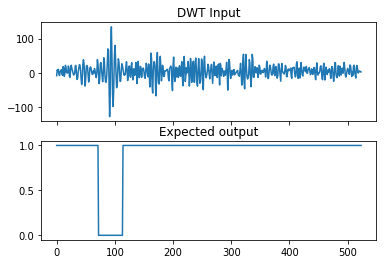

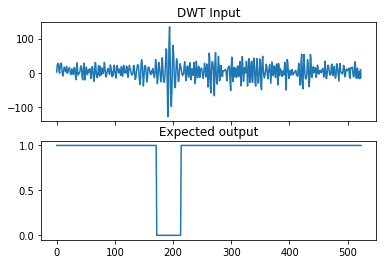

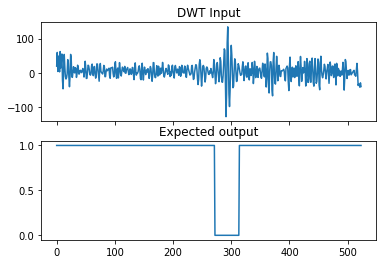

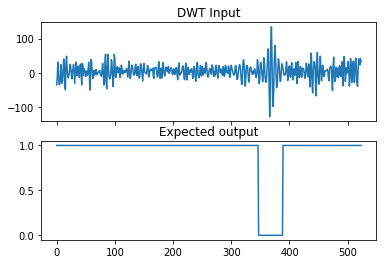

In [9]:
for i in range(101,105):
    test_inf=dwt_list[i]
    test_outf=annotation_list[i]
    test_in=np.loadtxt(file_path+test_inf)
    test_out=np.loadtxt(file_path+test_outf)
    [stest_in,stest_out]=data_creation(test_in[0],test_out,window_size=40)
    stest_in=stest_in.tolist()
    stest_out=np.squeeze(np.asarray(stest_out))
    pred_out=gmm.predict(stest_in)
    pred_out=np.roll(pred_out,-20)
    x=np.arange(len(pred_out))
    f,axarr=plt.subplots(2,sharex=True)
    axarr[0].plot(x,test_in[0])
    axarr[0].set_title('DWT Input')
    axarr[1].plot(x,pred_out)
    axarr[1].set_title('Expected output')
    plt.show()